## Omforming av tabeller med melt og pivot
### Uten omforming
Opprett et datasettet

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'År': [2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022],
'Region': ['Nord', 'Sør', 'Øst', 'Nord', 'Sør', 'Øst', 'Nord', 'Sør', 'Øst'],
'Løpesko': [70, 85, 110, 80, 100, 130, 90, 100, 120],
'Fotballsko': [90, 120, 180, 100, 140, 200, 110, 150, 220],
'Tursko': [140, 170, 220, 160, 200, 280, 180, 210, 260]})
display(df.head())

,År,Region,Løpesko,Fotballsko,Tursko
0,2020,Nord,70,90,140
1,2020,Sør,85,120,170
2,2020,Øst,110,180,220
3,2021,Nord,80,100,160
4,2021,Sør,100,140,200


Vis et enkelt søylediagram

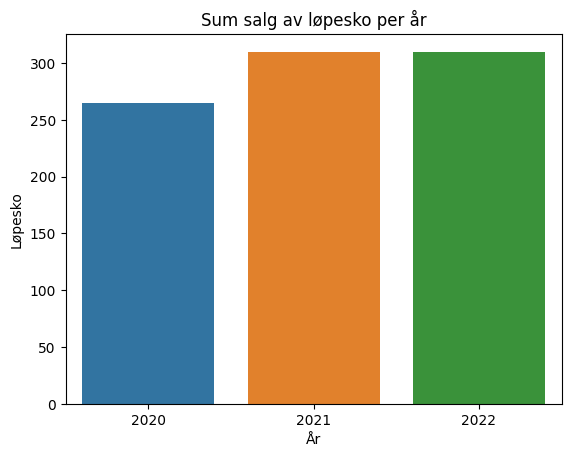

In [2]:
sns.barplot(data=df, x='År', y='Løpesko',
            estimator='sum', errorbar=None)
plt.title("Sum salg av løpesko per år")
plt.show()

Vis et grupprt søylediagram

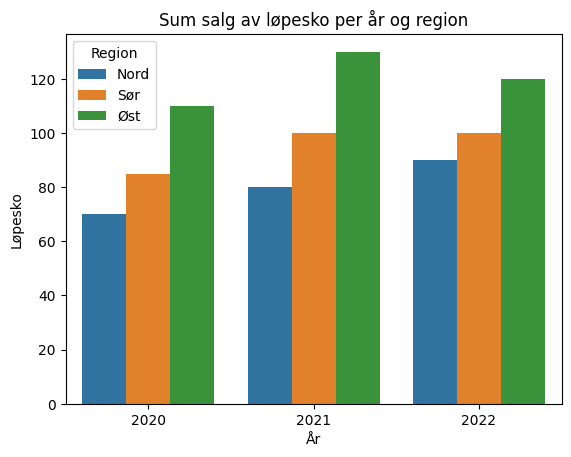

In [3]:
sns.barplot(data=df,x='År', y='Løpesko', hue='Region',
             estimator='sum', errorbar=None)
plt.title("Sum salg av løpesko per år og region")
plt.show()

### Melt
Gjør om fra bredt til langt format

In [4]:
melt_df = pd.melt(df, id_vars=['År', 'Region'],
                  var_name='Produkt', value_name='Salg')
display(melt_df.iloc[[0,1,9,10,18,19]])

,År,Region,Produkt,Salg
0,2020,Nord,Løpesko,70
1,2020,Sør,Løpesko,85
9,2020,Nord,Fotballsko,90
10,2020,Sør,Fotballsko,120
18,2020,Nord,Tursko,140
19,2020,Sør,Tursko,170


Vis gruppert søylediagram

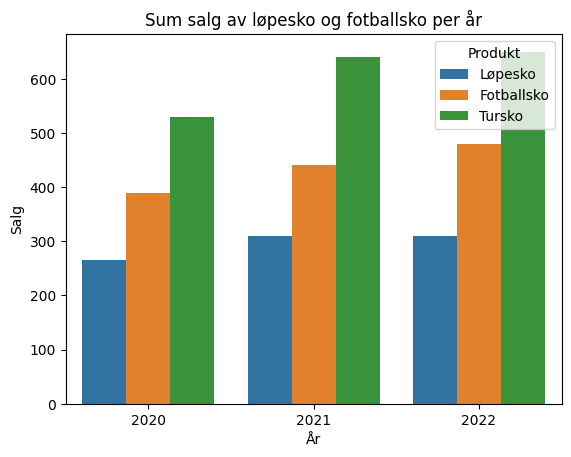

In [5]:
sns.barplot(data=melt_df, x='År', y='Salg', hue='Produkt',
             estimator='sum', errorbar=None)
plt.title("Sum salg av løpesko og fotballsko per år")
plt.show()

### Pivot
Omforme tabellen tilbake til sin opprinnelige form

In [6]:
pivoted_df = melt_df.pivot_table(
    index=["År", "Region"], columns="Produkt", values="Salg")
pivoted_df.reset_index(inplace=True)
display(pivoted_df)

Produkt,År,Region,Fotballsko,Løpesko,Tursko
0,2020,Nord,90,70,140
1,2020,Sør,120,85,170
2,2020,Øst,180,110,220
3,2021,Nord,100,80,160
4,2021,Sør,140,100,200
5,2021,Øst,200,130,280
6,2022,Nord,110,90,180
7,2022,Sør,150,100,210
8,2022,Øst,220,120,260


Vis en mer ovsiktlig tabell

In [7]:
df_pivot = df.pivot(index='År', columns='Region')
display(df_pivot)

Løpesko           Fotballsko           Tursko          
Region    Nord  Sør  Øst       Nord  Sør  Øst   Nord  Sør  Øst
År                                                            
2020        70   85  110         90  120  180    140  170  220
2021        80  100  130        100  140  200    160  200  280
2022        90  100  120        110  150  220    180  210  260

Formater tabellen med CSS

In [8]:
styles = {
    'header': 'background-color: #003366; \
               color: white; font-weight: bold;',
    'even': 'background-color: #f2f2f2; color: black;',
    'odd': 'background-color: #dddddd; color: black;'
}

styled_df = df_pivot.style \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': styles['header']
    }, {
        'selector': 'tr:nth-child(even)',
        'props': styles['even']
    }, {
        'selector': 'tr:nth-child(odd)',
        'props': styles['odd']
    }])

display(styled_df)

Aggreger data med pivot

In [9]:
df_pivot = df.pivot_table(values=['Løpesko',
    'Fotballsko', 'Tursko'], index='År', aggfunc=sum)
display(df_pivot)
# Summer over radene
s_pivot = df_pivot.sum(axis=1)
display(type(s_pivot),s_pivot)

,Fotballsko,Løpesko,Tursko
År,,,
2020,390,265,530
2021,440,310,640
2022,480,310,650


pandas.core.series.Series

År
2020    1185
2021    1390
2022    1440
dtype: int64

Vis totalt salg per år i et søylediagram

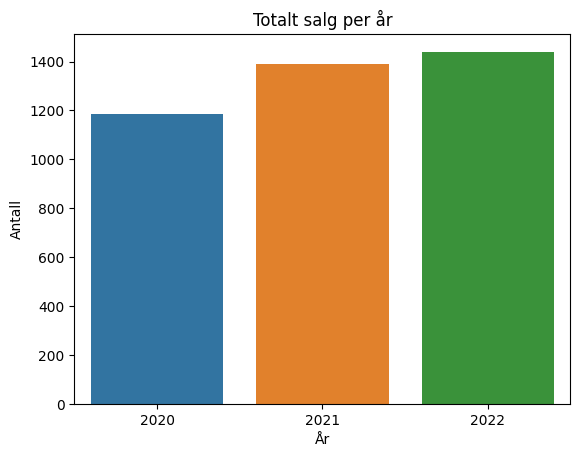

In [10]:
sns.barplot(x=s_pivot.index, y=s_pivot.values)
plt.title("Totalt salg per år")
plt.ylabel("Antall")
plt.xlabel("År")
plt.show()

Smidig IT-2 © TIP AS, 2024